<a href="https://colab.research.google.com/github/Vedantpatil03/Codesoft-Task-2/blob/main/Idmb_movie_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
uploaded = files.upload()
print(df.describe())



Saving IMDb Movies India.csv to IMDb Movies India (1).csv
          rating
count  10.000000
mean    3.980000
std     0.755425
min     2.500000
25%     3.725000
50%     4.000000
75%     4.425000
max     5.000000


In [ ]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv("IMDb Movies India.csv", encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    try:
        df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')  # Try Latin-1
    except UnicodeDecodeError:
        df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')  # Try ISO-8859-1

# Display the first few rows of the dataset
df.head(50)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [ ]:


# Display the first few rows
print(df.head())

# Check basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

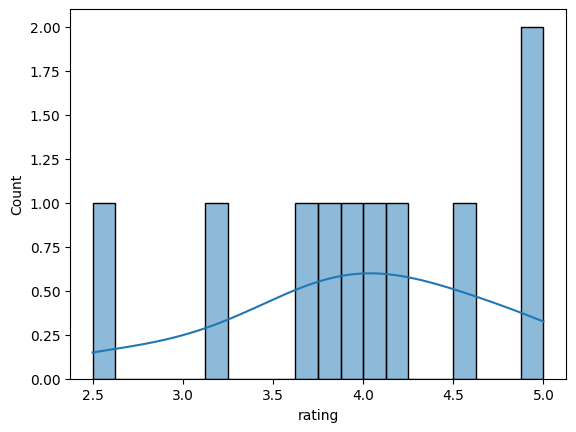

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load data into a DataFrame
# Replace this with your actual data loading code
data = {
    'rating': [4.5, 3.2, 5.0, 4.1, 3.8, 4.9, 2.5, 3.7, 4.2, 3.9]
}
df = pd.DataFrame(data)

# Create the histogram
sns.histplot(df['rating'], bins=20, kde=True)
plt.show()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean/mode or drop rows/columns)
df = df.dropna()  # Drop rows with missing values

rating    0
dtype: int64


          rating
count  10.000000
mean    3.980000
std     0.755425
min     2.500000
25%     3.725000
50%     4.000000
75%     4.425000
max     5.000000


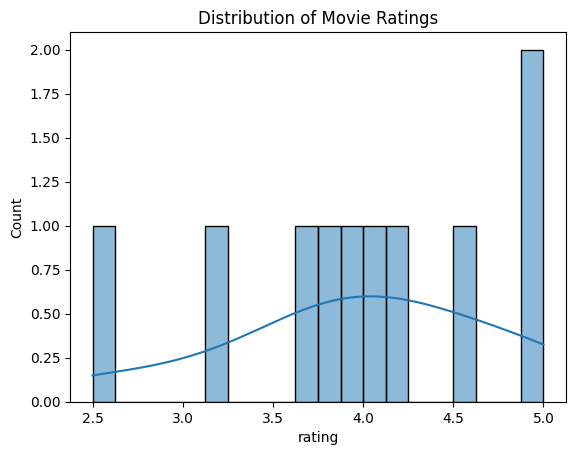

In [ ]:
# Summary statistics
print(df.describe())

# Distribution of ratings
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()